**CONTENTS**

Instructions

Loading libraries, drive, dataframe

Create a bar chart

Save chart

Line chart - money spent at different times of day

Creating a sample

Smaller dataframe of just needed columns

Create line chart

Create bar chart - products per time of day

Bar chart of only top 25 products - using head()

Bar chart of top 25 products - at one specific time

Checking price of a specific product

Checking average price of all products

Line chart - age vs average no. dependents

Scatterplot - age vs income

Export chart


**INSTRUCTIONS**

Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).
If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.
You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

    In a markdown cell beneath your histogram, describe what the histogram demonstrates.

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.
Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)
Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

    In a markdown cell beneath your line chart, describe what the line chart shows.

You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

    In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

Export your visualizations as “.png” files in your relevant project folder.

**Loading libraries, drive, dataframe**

In [ ]:
## -- Loading Libraries --
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
#Importing google drive#

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the most recent df - the one created in part 1 - from drive#
#REMEMBER this is a subset of the whole data#

df = pd.read_pickle('/content/drive/MyDrive/4.9_merged_clean.pkl')

In [ ]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,frequency_flag,Family_Name,Gender,State,Age,date_joined,number_dependents,family_circumstance,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,2907475,96682,prior,23,4,...,Regular customer,Bond,Female,Mississippi,71,1/8/2018,2,married,37754,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,3038506,39081,prior,16,2,...,Regular customer,Sosa,Female,Indiana,60,1/16/2017,1,married,143885,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,3185203,95847,prior,49,1,...,Frequent customer,Douglas,Male,Kentucky,27,8/24/2018,3,married,98288,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,1830804,14910,prior,56,4,...,Frequent customer,Valdez,Male,Kentucky,67,6/18/2019,0,divorced/widowed,39625,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,Regular customer,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,both


In [ ]:
df.dtypes

,0
product_id,int64
product_name,object
aisle_id,int64
department_id,int64
prices,float64
order_id,int64
user_id,object
eval_set,object
order_number,int64
order_dow,int64


**Create a bar chart**

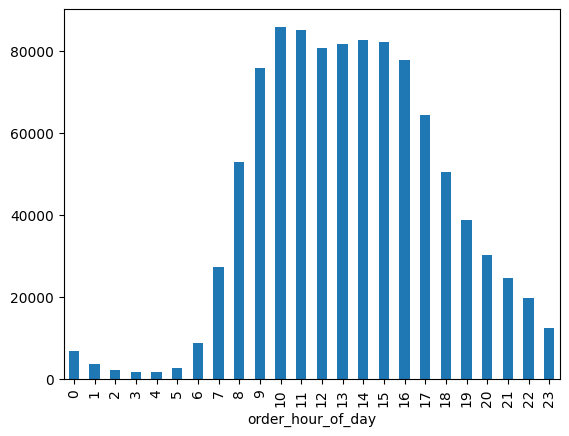

In [ ]:
#creating a bar chart - HISTOGRAM - of number of orders placed at different hours of the day#

#Sort by hour, no colour #

hist_hour = df['order_hour_of_day'].value_counts().sort_index().plot.bar()

Orders ramp up from breakfast time and stay high until later afternoon. Very few sales in the small hours of the morning.

**Save chart**

In [ ]:
#to save this, make sure google drive is still mounted#

#then define the path#

save_path = '/content/drive/My Drive/Plots/hist__hour_chart.png'

In [ ]:
#then save the hist plot#

hist_hour.figure.savefig(save_path, dpi=300)

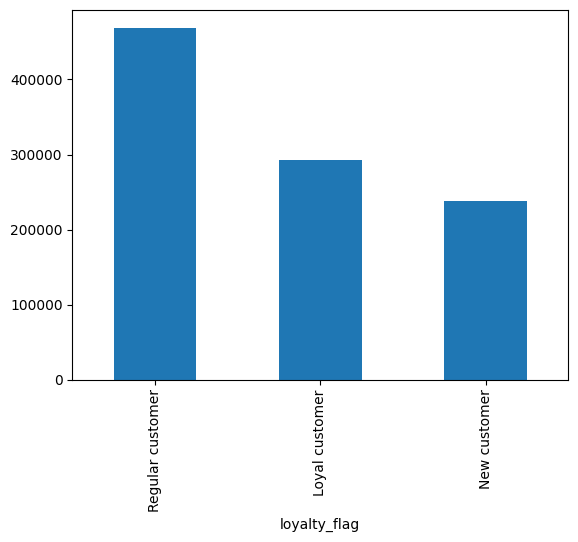

In [ ]:
# Create a bar chart from the “loyalty_flag” column #

bar_loyal = df['loyalty_flag'].value_counts().plot.bar()

Regular customers place the most orders. New Customers are not far behind Loyal Customers in volume of orders.

In [ ]:
#define the path#

save_path2 = '/content/drive/My Drive/Plots/bar_loyal.png'

#then save the bar plot#

bar_loyal.figure.savefig(save_path2, dpi=300)


**Line chart - money spent at different times of day**

**Creating a sample**

In [ ]:
# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!) #

#start with a sample#

#To create a sample first need a "seed" which can be reproduced down the line #
#so doesn't matter that I choose '4', just as long as I know that's what I chose

#then create a new column 'dev' which is 'True' when the random we assign to every row is less than 0.7#

#(in other words we have splits the data 70/30 - can then later be: 70% train and 30% test#

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [ ]:
# Checking the relative %s of Booleans in dev#

percentages = pd.Series(dev).value_counts(normalize=True) * 100
print(percentages)

True     69.9239
False    30.0761
Name: proportion, dtype: float64


In [ ]:
#Now split the data#

#this creates 2 data sets; big where dev = true (70%) and small where dev = false (30%)

big = df[dev]
small = df[~dev]

**Smaller dataframe of just needed columns**

In [ ]:
#Create a smaller dataframe of just the columns we need #

df_orders_prices = small[['order_hour_of_day','prices']]

In [ ]:
#check that looks right

df_orders_prices.head()

,order_hour_of_day,prices
0,14,5.8
2,7,5.8
3,12,5.8
6,10,5.8
10,15,5.8


In [ ]:
df_orders_prices.shape

(300761, 2)

**Create line chart**

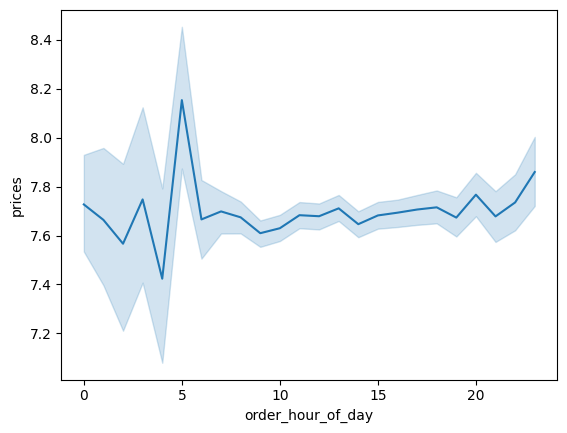

In [ ]:
#create a line chart#

line = sns.lineplot(data = df_orders_prices, x = 'order_hour_of_day',y = 'prices')

Although there aren't many orders at 5am, there IS a huge spike in prices at this time. What is being ordered at 5am?
Otherwise prices fairly consistent, slowly build in the afternoon and especially later evening

In [ ]:
#define the path#

save_path3 = '/content/drive/My Drive/Plots/line_hour.png'

#then save the bar plot#

line.figure.savefig(save_path3, dpi=300)


**Create bar chart - products per time of day**

In [ ]:
#Looking at 5am - first create a bar chart of all producst ordered at any time of day



<Axes: xlabel='product_name'>

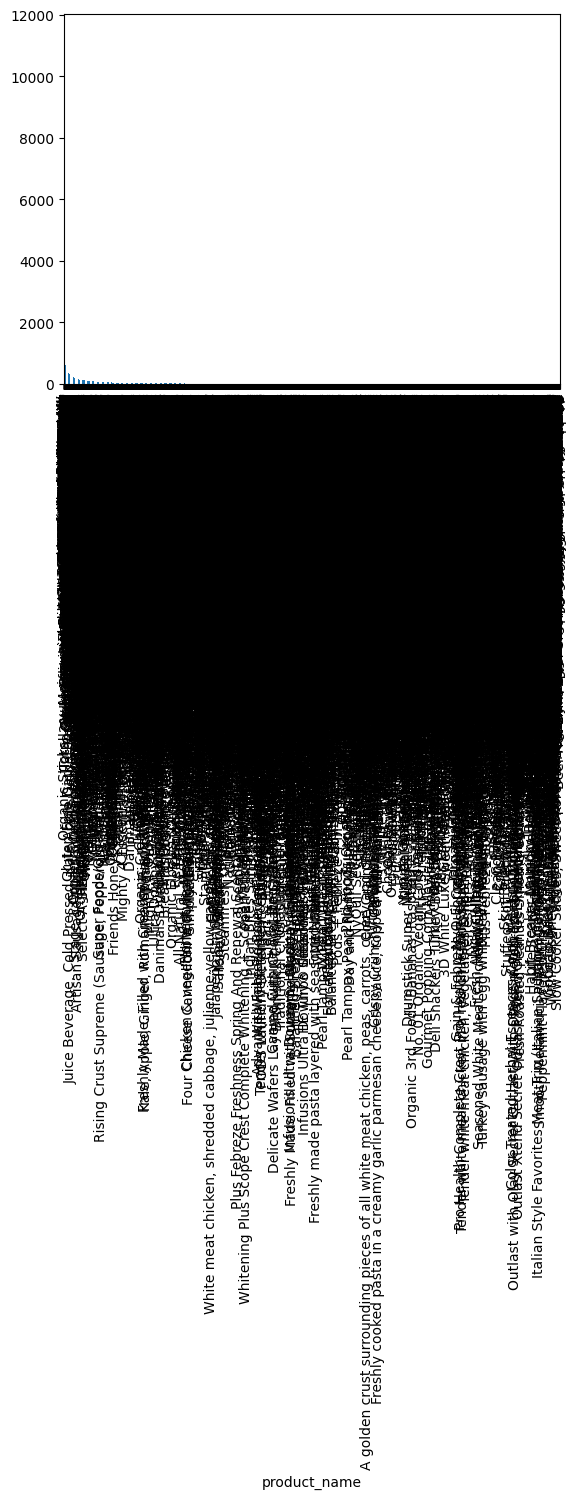

In [ ]:
# Create a bar chart from the “product_name” column #

small['product_name'].value_counts().plot.bar()

That's not very useful! Maybe look at top 25 products only.

**Bar chart of only top 25 products - using head()**

<Axes: xlabel='product_name'>

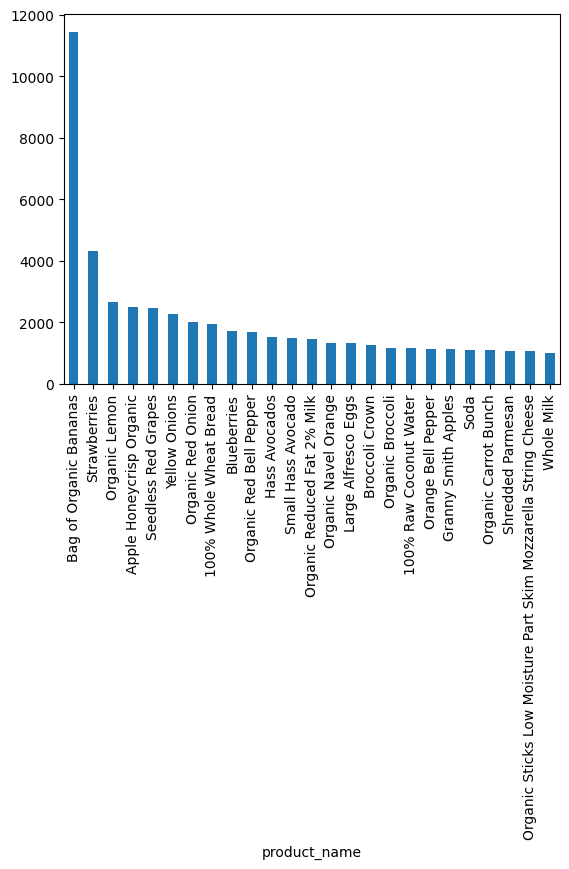

In [ ]:
#Looking at top 25 products only

small['product_name'].value_counts().head(25).plot.bar()

**Bar chart of top 25 products - at one specific time**

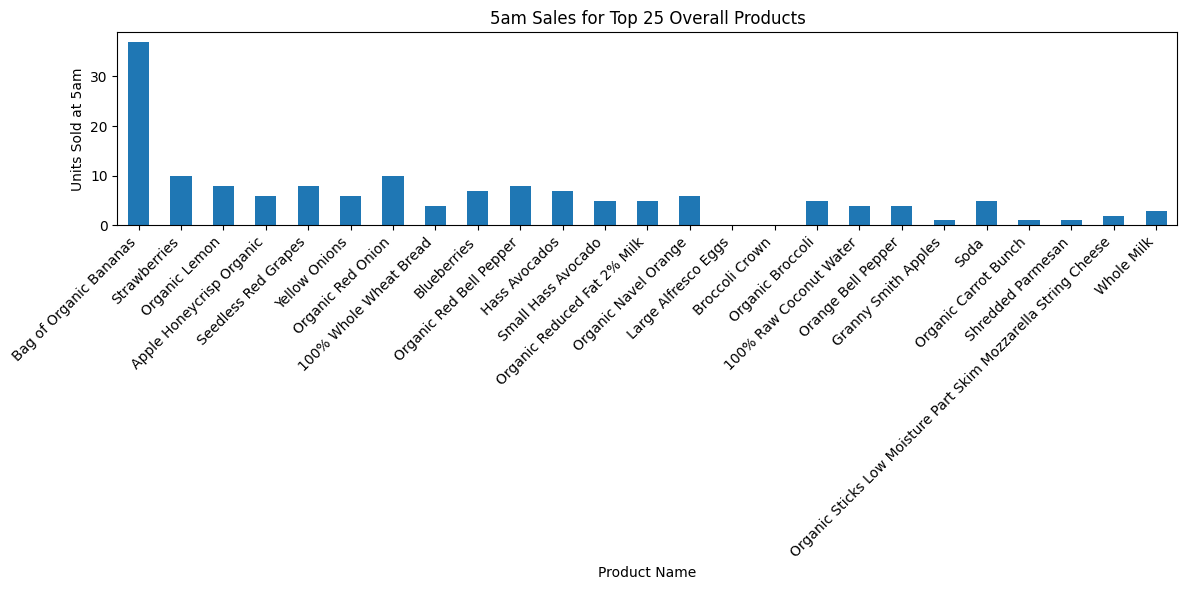

In [ ]:
#And now compare that with just sales at 5am - help from Co-pilot here

# Step 1: Get top 25 products overall
top_25_overall = small['product_name'].value_counts().head(25).index

# Step 2: Filter for 5am sales of those products
sales_at_5am = small[(small['order_hour_of_day'] == 5) & (small['product_name'].isin(top_25_overall))]

# Step 3: Count sales at 5am for those products
sales_counts_5am = sales_at_5am['product_name'].value_counts().reindex(top_25_overall, fill_value=0)

# Step 4: Plot
sales_counts_5am.plot.bar(figsize=(12, 6))
plt.title('5am Sales for Top 25 Overall Products')
plt.xlabel('Product Name')
plt.ylabel('Units Sold at 5am')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


That doesn't actually help much, what I really need are the top 25 items at 5am

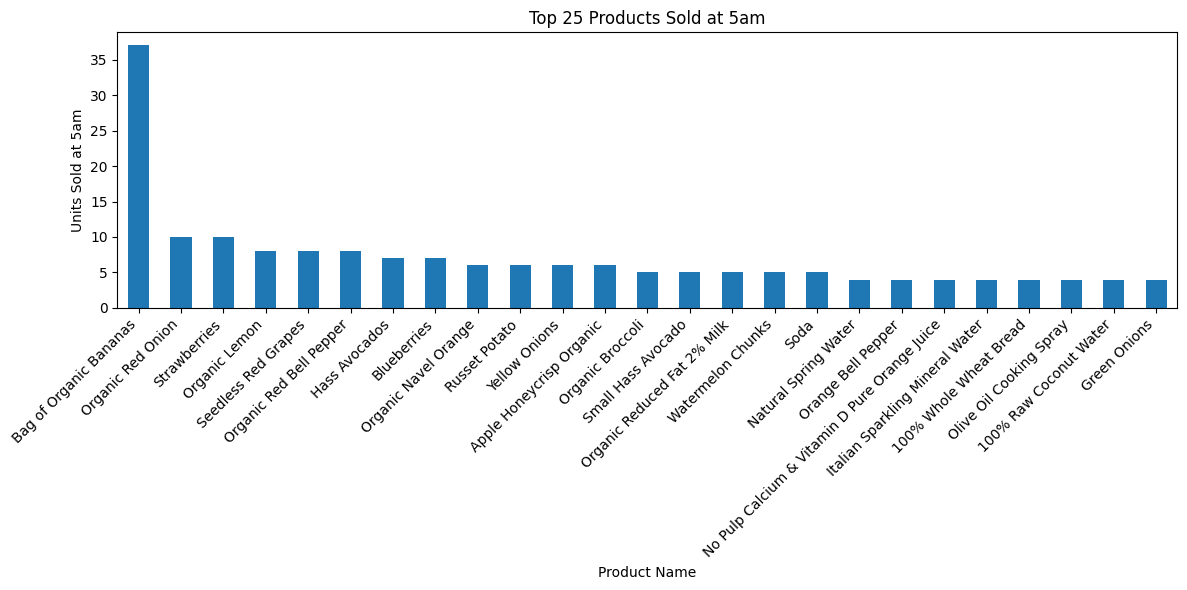

In [ ]:
#Again help from Co-pilot

# Step 1: Filter for 5am sales
sales_at_5am = small[small['order_hour_of_day'] == 5]

# Step 2: Get top 25 products sold at 5am
top_25_5am = sales_at_5am['product_name'].value_counts().head(25)

# Step 3: Plot
top_25_5am.plot.bar(figsize=(12, 6))
plt.title('Top 25 Products Sold at 5am')
plt.xlabel('Product Name')
plt.ylabel('Units Sold at 5am')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

So, it appears that lots more organic bananas are sold at 5am, and that's what's making the spike

**Checking price of a specific product**

In [ ]:
#Let's see what Organic Bananas cost!

small.loc[small['product_name'] == 'Bag of Organic Bananas', 'prices']


,prices
752562,10.3
752563,10.3
752570,10.3
752571,10.3
752572,10.3
...,...
790773,10.3
790779,10.3
790783,10.3
790787,10.3


**Checking average price of all products**

In [ ]:
#What's the average price

small['prices'].describe()

,prices
count,300761.000000
mean,7.681676
std,4.400878
min,1.000000
25%,4.000000
50%,7.200000
75%,11.000000
max,25.000000


So, Organic bananas cost 10.30, whereas the avereg price is 7.68. So if LOTS more are sold at 5am, that will explain the spike

**Line chart - age vs average no. dependents**

In [ ]:
#Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns.
# First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

#Create a smaller dataframe of just the columns we need #

df_age_depends = small[['Age','number_dependents']]

In [ ]:
df_age_depends.head()

,Age,number_dependents
0,71,2
2,27,3
3,67,0
6,37,1
10,52,2


In [ ]:
df_age_depends.shape

(300761, 2)

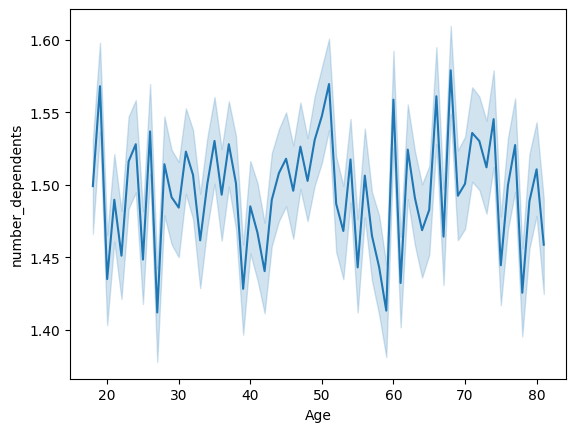

In [ ]:
#create a line chart#

line2 = sns.lineplot(data = df_age_depends, x = 'Age',y = 'number_dependents')

So, no correlation between age and dependents

In [ ]:
#define the path#

save_path4 = '/content/drive/My Drive/Plots/age_depend.png'

#then save the bar plot#

line2.figure.savefig(save_path4, dpi=300)


**Scatterplot - age vs income**

In [ ]:
#You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

#Create a smaller dataframe of just the columns we need #

df_age_power = small[['Age','income']]


In [ ]:
df_age_power.head()

,Age,income
0,71,37754
2,27,98288
3,67,39625
6,37,63251
10,52,36202


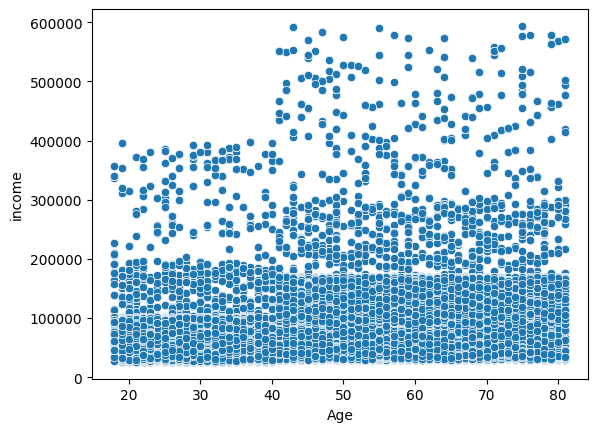

In [ ]:
#scatterplot to see if there's a correlation#

scatter_age_income = sns.scatterplot(x = 'Age', y = 'income',data = df_age_power)

We don't see some of the very highest incomes until people are over 40.

But in general, most people earn the same  - lees than 200,000 - the outliers are those than earn more than that

**Export chart**

In [ ]:
#define the path#

save_path5 = '/content/drive/My Drive/Plots/age_income.png'

#then save the bar plot#

scatter_age_income.figure.savefig(save_path5, dpi=300)
